Um projétil é disparado para cima com uma inclinação (ângulo de inclinação ϕ
) com velocidade inicial vi
 em um ângulo θ
 em relação à horizontal (θ>ϕ
), como mostrado na Figura.

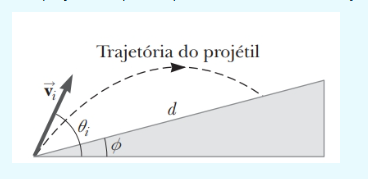

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo

c) Modifique seu programa da letra b) para comparar as alturas e encontrar o tempo que há a colisão entre o projétil e o plano. Qual o valor do tempo?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

Tempo (t): [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6 ]
Posição x: [ 0.          0.16263456  0.32526912  0.48790368  0.65053824  0.8131728
  0.97580736  1.13844192  1.30107648  1.46371104  1.6263456   1.78898016
  1.95161472  2

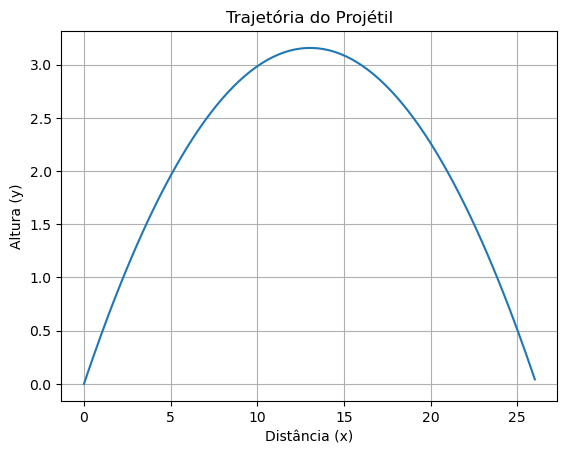

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#função que calcula a trajetória do projétil
def traj_projetil(v0=None, theta=None, phi=None, g=9.8, dt=0.01):
    if v0 is None:
        v0 = int(input('Insira seu v0: '))
    if theta is None:
        theta = int(input('Insira seu theta: '))
    if phi is None:
        phi = int(input('Insira seu phi: '))


   #calculamos os angulos em radianos
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)

    #calculos as componentes do vetor velocidade
    v0x = v0 * np.cos(theta_rad)
    v0y =v0 * np.sin(phi_rad)

    #tempo que o projetil leva para atingir o chão (tempo maximo)
    t_max = 2 * v0y / g

    #armazenando dados como arrays
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2

    #removemos valores negativos 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]

    return t, x, y

#v0 = int(input('Insira seu v0: '))
#theta = int(input('Insira seu theta: '))
#phi = int(input('Insira seu phi: '))

t, x, y = traj_projetil()
print("Tempo (t):", t)
print("Posição x:", x)
print("Posição y:", y)

# Plotando a trajetoria
plt.plot(x, y)
plt.xlabel('Distância (x)')
plt.ylabel('Altura (y)')
plt.title('Trajetória do Projétil')
plt.grid()
plt.show()
    

a) 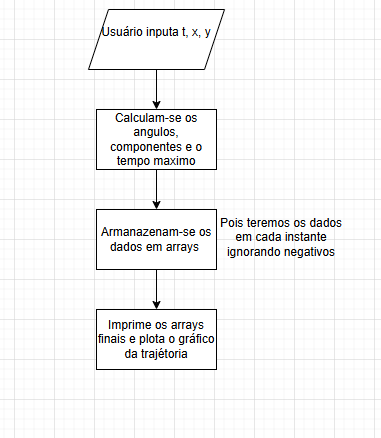

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo


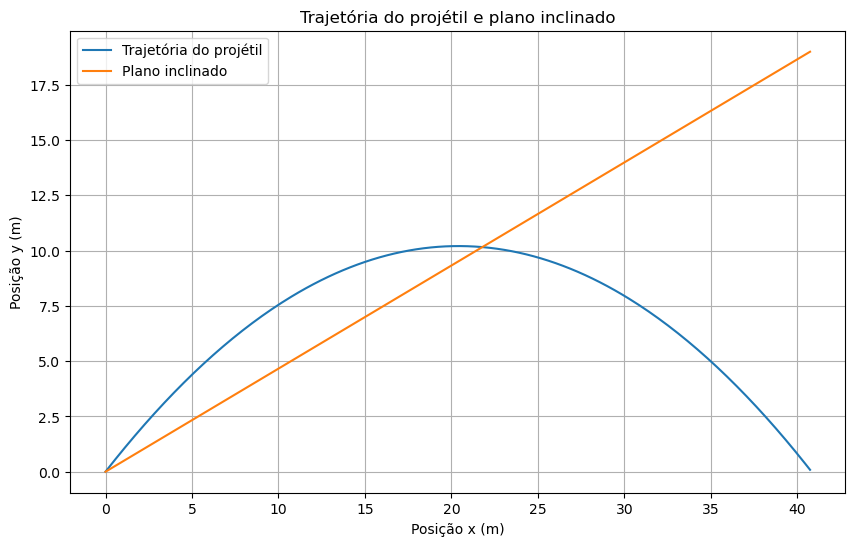

In [36]:
def trajetoria_com_plano(v0, theta, phi, g=9.8, dt=0.01):
    
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    
    # Componentes da velocidade inicial
    v0x = v0 * np.cos(theta_rad)
    v0y = v0 * np.sin(theta_rad)
    
    # Tempo até o projétil atingir o solo 
    t_max = 2 * v0y / g
    
    # Arrays para armazenar resultados
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2
    
    # Altura do plano inclinado em cada posição x
    y_plano = np.tan(phi_rad) * x
    
    # Remove valores negativos de y 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]
    y_plano = y_plano[mask]
    
    return t, x, y, y_plano

v0 = 20
theta = 45
phi = 25

t, x, y, y_plano = trajetoria_com_plano(v0, theta, phi)

# Plot da trajetória e do plano
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Trajetória do projétil')
plt.plot(x, y_plano, label='Plano inclinado')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Trajetória do projétil e plano inclinado')
plt.grid(True)
plt.legend()
plt.show()